In [ ]:
#|default_exp app

# Deploying Alient vs. Ghost

In this article, we will deploy the model that we trained using [FastAI](https://www.fast.ai/) on part 1 on [Hugging Face Spaces](https://huggingface.co/spaces) with [Gradio](https://www.gradio.app/) and [nbdev](https://nbdev.fast.ai/).

![prediction page deployed on Hugging Face Spaces](AvG_on_HFS2.png "App making prediction")

But why do we want to bother to deploy our model? We have a model that works! Well, because we cannot easily share our working model with others. We do not want our friends and family to run jupyter notebook or colab in order to try out what we created. We could make a website ourselves, but there is a better way: using Gradio. Gradio is an easy way to setup a web app for others. You can play with the [final product](https://huggingface.co/spaces/galopyz/Alien_vs_Ghost). It is deployed on Hugging Face Spaces because they take care of all the backend things. Once, deployed, we do not have to take care of scaling and other headaches.

Another tool we are using today is nbdev. nbdev allows us to convert code in Jupyter notebook into modules so that we do not have to manually copy and paste code from Jupyter notebook into a file. So, while we are figuring out and experimenting with our code in Jupyter notebook, we are also writing finished product as well. 

::: {.callout-tip}

Since we are creating a web app, we can run it on mobile devices as well. I shared this with my family through phones, and it was very fun.

:::

## Create Hugging Face Spaces

First thing we will do is create a Hugging Face Space. Let's head over to [Hugging Face Spaces](https://huggingface.co/spaces). Click Create new Space on the right. You will be directed to this page:

![Creating a new space](create_space.png "Creating a new space")

Fill in Space name, choose a License and click Gradio. Then, scroll down to create space.

Now, we have a Github repository that we can start working on. We can clone the repository by typing `git clone https://huggingface.co/spaces/galopyz/Exciting_project` in the terminal. If you are not familiar with Github, here is a [tutorial](https://docs.github.com/en/get-started/quickstart/hello-world).

We will be working in this repository for the rest of this article. So, let's head there and open up a Jupyter notebook. 

## Grab the model and get libraries

First, grab the model we trained from part 1 and import Gradio and FastAI. We need Gradio to create widgets and FastAI to make predictions.

If you don't have Gradio installed on your computer, you can use `pip install gradio` to install it on the terminal or `!pip install gradio` in the Jupyter notebook cell like this:

``` python
!pip install gradio
```
:::{.cell-output}
    bulla bulla (downloading stuff)
:::

Then, we import libraries. As we can see, we have `#| export` at the top of the cell. This is called a [directive](https://nbdev.fast.ai/explanations/directives.html). This simply lets nbdev know that we need this cell when we convert this Jupyter notebook into a module later. Without this, nbdev will skip this cell and move onto the next one with `#| export`. Because our module needs to import those libraries in order to make predictions and create widgets, we need this cell to be exported.

``` python
#| export
from fastai.vision.all import *
import gradio as gr
```

In [ ]:
#| export
from fastai.vision.all import *
import gradio as gr

We assign `learn` using `load_learner` on the pickled model. This is same `learn` that we created in part 1, so we can also make predictions with it.

``` python
#| export
learn = load_learner('alien_vs_ghost.pkl')
```

In [ ]:
#| export
learn = load_learner('alien_vs_ghost.pkl')

In [ ]:
learn.dls.vocab

['alien', 'ghost']

Again, we are using `export` directive to load learner. However, we are not exporting the cell containing `learn.dls.vocab` because we are just checking vocab (categories or labels we trained the model with). So, cells that we are experimenting and checking values do not have to be exported.

Let's download a new image and test the model. You can go to a search engine and download an image and test it to see if it still works!

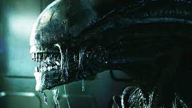

In [ ]:
path = Path('alien1.jpeg')
alien1 = PILImage.create(path)
alien1.thumbnail((192, 192))
alien1

In [ ]:
learn.predict(alien1)

('alien', TensorBase(0), TensorBase([9.9972e-01, 2.7873e-04]))

That worked! Now let's create a function that classifies images and returns the probabilities on each category. Then, we can use this for the widget.

``` python
#|export
categories = learn.dls.vocab
def classify_images(img):
    """classifies images and returns the probabilities on each categories."""
    pred, pred_idx, probs = learn.predict(img)
    return dict(zip(categories, map(float, probs)))
```

In [ ]:
#|export
categories = learn.dls.vocab
def classify_images(img):
    """classifies images and returns the probabilities on each categories."""
    pred, pred_idx, probs = learn.predict(img)
    return dict(zip(categories, map(float, probs)))

In [ ]:
classify_images(alien1)

{'alien': 0.9997212290763855, 'ghost': 0.00027872977079823613}

Wonderful! Now, we can use Gradio to try out different images. You can download more images and put them in examples list so that we can try different ones. Once we run this, we will get a link to a local URL so that we can try it out. You will have something similar to [this](https://huggingface.co/spaces/galopyz/Alien_vs_Ghost).

``` python
#|export
image = gr.inputs.Image(shape=(192, 192))
label = gr.outputs.Label()
# If you have more or less examples, edit this list.
examples = ['alien1.jpeg', 'alien2.jpeg', 'ghost1.jpeg', 'ghost2.jpeg', 'dunno1.jpeg', 'dunno2.jpeg']

inf = gr.Interface(fn=classify_images, inputs=image, outputs=label, examples=examples)
inf.launch(inline=False)
```
::: {.cell-output}
    Running on local URL:  http://127.0.0.1:7860
    To create a public link, set `share=True` in `launch()`.
    (<gradio.routes.App>, 'http://127.0.0.1:7860/', None)
:::

In [ ]:
#|export
image = gr.inputs.Image(shape=(128, 128))
label = gr.outputs.Label()
# If you have more or less examples, edit this list.
examples = ['alien1.jpeg', 'alien2.jpeg', 'ghost1.jpeg', 'ghost2.jpeg', 'dunno1.jpeg', 'dunno2.jpeg']

inf = gr.Interface(fn=classify_images, inputs=image, outputs=label, examples=examples)
inf.launch(inline=False)

/home/kappa/miniconda3/lib/python3.9/site-packages/gradio/inputs.py:256: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/home/kappa/miniconda3/lib/python3.9/site-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/home/kappa/miniconda3/lib/python3.9/site-packages/gradio/outputs.py:196: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/home/kappa/miniconda3/lib/python3.9/site-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App>, 'http://127.0.0.1:7860/', None)

.

That's cool! Let's deploy it to Hugging Face Spaces!

## Export using nbdev

This is the time nbdev will do the magic. Create a cell like this on the top of our Jupyter notebook:

``` python
#| default_exp app
```

As you can see from `#|`, this is a directive. This simply sets a name of the module we are about to export. So, resulting python module will be called `app.py`. 

If nbdev is not installed yet, you can do `pip install nbdev` or `conda install -c fastai nbdev
`. 

Then, we simply import it, and export it. First argument for `nbdev.export.nb_export` is the name of the Jupyter notebook we are currently on right now, and second argument is a path where nbdev will create a new python module. So, in this example, nbdev will create a python module from the notebook called `index.ipynb` into the current directory.

In [ ]:
import nbdev

In [ ]:
nbdev.export.nb_export('index.ipynb', '.')

Now, check out `app.py` that is generated automatically! How cool is this? 

In [ ]:
!cat app.py

# AUTOGENERATED! DO NOT EDIT! File to edit: index.ipynb.

# %% auto 0
__all__ = ['learn', 'categories', 'image', 'label', 'examples', 'inf', 'classify_images']

# %% index.ipynb 14
from fastai.vision.all import *
import gradio as gr

# %% index.ipynb 17
learn = load_learner('alien_vs_ghost.pkl')

# %% index.ipynb 25
categories = learn.dls.vocab
def classify_images(img):
    """classifies images and returns the probabilities on each categories."""
    pred, pred_idx, probs = learn.predict(img)
    return dict(zip(categories, map(float, probs)))

# %% index.ipynb 29
image = gr.inputs.Image(shape=(192, 192))
label = gr.outputs.Label()
# If you have more or less examples, edit this list.
examples = ['alien1.jpeg', 'alien2.jpeg', 'ghost1.jpeg', 'ghost2.jpeg', 'dunno1.jpeg', 'dunno2.jpeg']

inf = gr.Interface(fn=classify_images, inputs=image, outputs=label, examples=examples)
inf.launch(inline=False)


Imagine if we did not use nbdev. We would have to go back to the beginning of the notebook and try to find out which lines of code need to be copied into a python module. This is a small notebook, but imagine having a long notebook! nbdev takes care of all the headache.

## Dependency requirement

In the deployment environment, there is no FastAI. So, we have to create a file called `requirements.txt`. Inside of the file, write 

| fastai
| torch==1.12.1

in there. You can take a peak [here](https://huggingface.co/spaces/galopyz/Alien_vs_Ghost/blob/main/requirements.txt).

## Upload files to Github

Finally, last step is uploading files to Github. We have to upload everything in this directory except for the Jupyter notebook we worked on. One problem with uploading is that our pickled model is too big to be uploaded into Github directly. So, we need [Git LFS](https://git-lfs.github.com/) (Git Large File Storage). 

(@) we install it with `git lfs install`

(@) we track big files with `git lfs track "*.pkl"`

(@) we save the settings with `git add .gitattributes`

(@) we add everything in the directory to Github with `git add .`

(@) Let's commit with `git commit -am "Deploying to huggingface spaces"`

(@) Lastly, we push with `git push`

That's it. It should now be running in your Hugging Spaces in a minute!

## Conclusion

As we have seen, training a model and deploying it does not cost any money. Also, it did not take a very long time to do it either. This is something anybody can do if they are willing to learn some tools, such as [Github](https://github.com/), [Jupyter notebook](https://jupyter.org/), [Python](https://www.python.org/), [nbdev](https://nbdev.fast.ai/), and [Hugging Face Spaces](https://huggingface.co/). 

So, now that you have an amazing project, why don't you share it with others? You can share [here](https://forums.fast.ai/t/share-your-work-here/) as well.

I hope you had a lot of fun and more in the future!